<a href="https://colab.research.google.com/github/aolivar139/lazada-rating-prediction-model/blob/main/Group_Hello_Lazada_Rating_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Anatomy of the dataset

- `p_brand`: brand of Lazada item
- `p_cate`: category of item
- `p_image`: url/id of image of item
- `p_mall`: tells if the item is lazmall or non lazmall
- `p_name`: name of item
- `p_number_reviews`: total amount of reviews submitted
- `p_price`: price of item in Vietnamese Dong
- `p_rate1star`,
`p_rate2star`,
`p_rate3star`,`p_rate4star`, `p_rate5star`: amount of reviews per star (1 to 5 stars)
- `p_rating`: total rating based on amount of reviews and stars
- `s_name`: name of shop
- `s_rating`: rating of shop overall in percentage
- `s_response_rate`: response rate of shop in percentage
- `s_ship_ontime`: percentage the shop ships on time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
import numpy as np
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

'''
The dataset is here, I uploaded a the csv onto a github repo and you can
access it using the df variable
'''
url = 'https://raw.githubusercontent.com/luisbauu/machine-learning-csv/main/LazadaProductData.csv'
col_list = ["p_brand", "p_cate", "p_mall", "p_number_reviews", "p_price", "s_response_rate", "s_ship_ontime", "p_rating"]
df = pd.read_csv(url, sep=',', usecols=col_list)
ml = pd.read_csv(url)

Scatterplot - Compare Store/Product Rating, Price, Response Rate, Ship On Time  with Products Sold.  (Correlation Matrix, also)
Histogram - Product sold count


To remove - p_image, p_ratexstar

### Cleaning Data

In [ ]:
#Visual of uncleaned data
df.head(100)

,p_brand,p_cate,p_mall,p_number_reviews,p_price,p_rating,s_response_rate,s_ship_ontime
0,Dell,Máy vi tính & Laptop,Mall,Không có đánh giá,31.490.000 ₫,0.0,100%,100%
1,HP,Máy vi tính & Laptop,Mall,Không có đánh giá,31.490.000 ₫,0.0,89%,100%
2,HP,Máy vi tính & Laptop,Mall,1 đánh giá,12.390.000 ₫,5.0,89%,100%
3,Dell,Máy vi tính & Laptop,Non-Mall,Không có đánh giá,23.000.000 ₫,0.0,66%,100%
4,OnePlus,Máy vi tính & Laptop,Non-Mall,Không có đánh giá,8.000.000 ₫,0.0,66%,100%
...,...,...,...,...,...,...,...,...
95,HP,Máy vi tính & Laptop,Non-Mall,Không có đánh giá,13.200.000 ₫,0.0,100%,100%
96,HP,Máy vi tính & Laptop,Non-Mall,Không có đánh giá,14.300.000 ₫,0.0,100%,100%
97,Dell,Máy vi tính & Laptop,Non-Mall,Không có đánh giá,17.990.000 ₫,NaN,Không đủ thông tin,100%
98,Razer,Máy vi tính & Laptop,Non-Mall,Không có đánh giá,18.000.000 ₫,0.0,66%,100%


In [ ]:
#Translating characters in 'p_number_reviews' into a number form. Converting column dtype to numeric.
df['p_number_reviews'] = df['p_number_reviews'].str.replace('đánh giá','')
df['p_number_reviews'] = df['p_number_reviews'].str.replace('Không có','0')
df['p_number_reviews'] = pd.to_numeric(df['p_number_reviews'])

#Cleaning 'p_price' of characters and converting to numeric
df['p_price'] = df['p_price'].str.replace('₫','')
df['p_price'] = df['p_price'].str.replace('.','')
df['p_price'] = pd.to_numeric(df['p_price'])

#Cleaning 's_response_rate' of characters and converting to numeric
df['s_response_rate'] = df['s_response_rate'].str.replace('%','')
df['s_response_rate'] = df['s_response_rate'].str.replace('Không đủ thông tin','0')
df['s_response_rate'] = pd.to_numeric(df['s_response_rate'])

#Cleaning 's_ship_ontime' of characters and converting to numeric'
df['s_ship_ontime'] = df['s_ship_ontime'].str.replace('%','')
df['s_ship_ontime'] = df['s_ship_ontime'].str.replace('Không đủ thông tin','0')
df['s_ship_ontime'] = pd.to_numeric(df['s_ship_ontime'])

#Converting zeroes in 's_response_rate', 's_ship_ontime' to NaN
df['s_response_rate'] = df['s_response_rate'].replace(0, np.nan)
df['s_ship_ontime'] = df['s_ship_ontime'].replace(0, np.nan)

#Filling in missing 'p_brand' entries with "No brand"
df['p_brand'].fillna("No brand", inplace=True)

In [ ]:
#Converting categorical data
#p_brand conversion
df['p_brand'].value_counts()
df = pd.get_dummies(df,columns=['p_brand'])
df.head()
#p_cate conversion
df['p_cate'].value_counts()
df = pd.get_dummies(df,columns=['p_cate'])
df.head()
#p_mall conversion
df['p_mall'].value_counts()
df = pd.get_dummies(df,columns=['p_mall'])

In [ ]:
#Plotting outliers for select variables
def plotvariable(df, variable):
  plt.figure(figsize=(16,4))
  #histo
  plt.subplot(1,2,1)
  plt.hist(df[variable], alpha=0.5)
  #boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[variable])
  plt.show()


In [ ]:
features = ['p_number_reviews', 'p_price', 's_response_rate', 's_ship_ontime', 'p_rating']

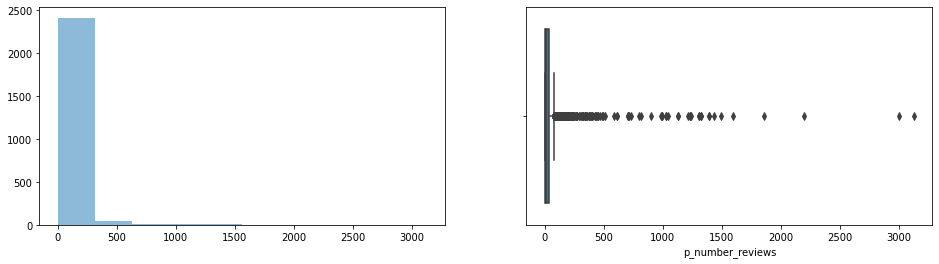

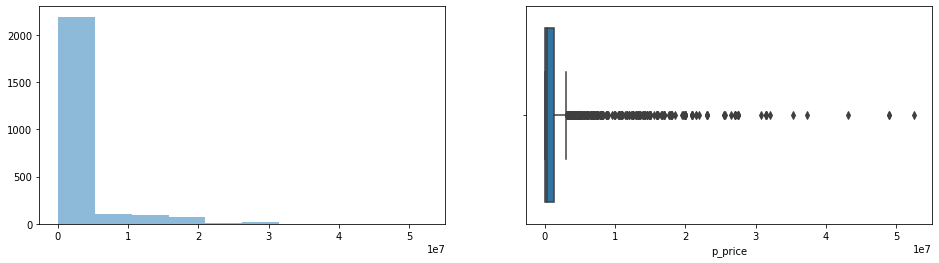

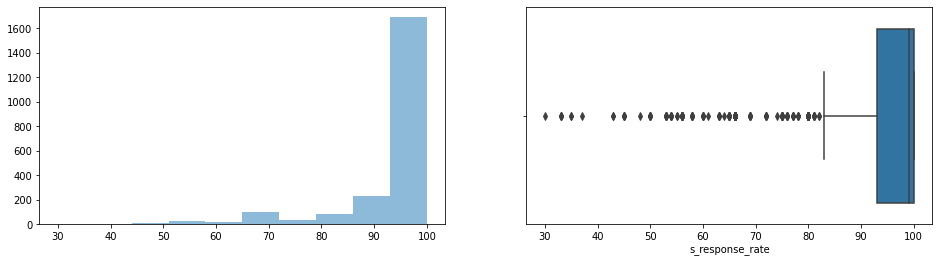

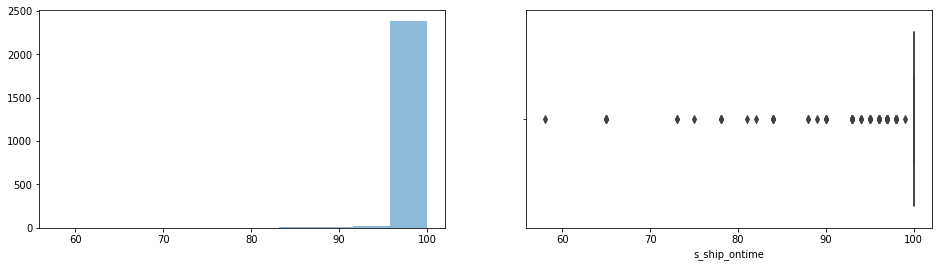

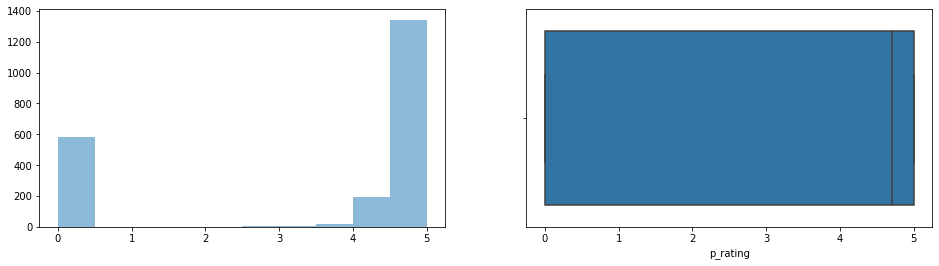

In [ ]:
for feature in features:
  plotvariable(df, feature)

In [ ]:
#Function for capping outliers
def iqr_capping(df, cols, factor):
  for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    upper_bound = q3 + (factor * iqr)
    lower_bound = q1 - (factor * iqr)

    df[col] = np.where(df[col] > upper_bound, upper_bound,
              np.where(df[col] < lower_bound, lower_bound, df[col]))

In [ ]:
iqr_capping(df, features, 1.5)

In [ ]:
#Imputing mean into 's_reponse_rate', 's_ship_ontime', 'p_rating'
s_response_rate_mean = df['s_response_rate'].mean()
df['s_response_rate'].fillna(s_response_rate_mean, inplace=True)

s_ship_ontime_mean = df['s_ship_ontime'].mean()
df['s_ship_ontime'].fillna(s_ship_ontime_mean, inplace=True)

p_rating_mean = df['p_rating'].mean()
df['p_rating'].fillna(p_rating_mean, inplace=True)

In [ ]:
#Rounding
df = df.round(decimals=2)
#Putting target column at the front
cols = df.columns.tolist()
cols = cols[2:] + cols[:2]
df = df[cols]

In [ ]:
#Visual of final cleaned data
df.head(100)

,p_rating,s_response_rate,s_ship_ontime,p_brand_4Tech,p_brand_4U,p_brand_ARCTIC HUNTER,p_brand_ASUS,p_brand_ATAS,p_brand_Adidas,p_brand_Apple,p_brand_BASEUS,p_brand_BEE GEE,p_brand_BEMINE,p_brand_BLEUBIRD,p_brand_BT Fashion,p_brand_Beego,p_brand_BigMax,p_brand_Blitzwolf,p_brand_Brand's,p_brand_CARECAM,p_brand_CHENNY,p_brand_CNT,p_brand_Cali D&Y,p_brand_Cater,p_brand_Coemi,p_brand_Dahua,p_brand_Dell,p_brand_Dottie,p_brand_EDINI,p_brand_Elise,p_brand_Epson,p_brand_Ezviz,p_brand_FPT Play Box,p_brand_Fantech,p_brand_Fitbit,p_brand_Fujifilm,p_brand_Garmin,p_brand_Gigabyte,p_brand_GoPro,p_brand_Google,p_brand_Gumac,p_brand_H & N,p_brand_HARAS,p_brand_HOCE,p_brand_HP,p_brand_HTG8,p_brand_HUAMI,p_brand_HUAWEI HiLink,p_brand_Handtown,p_brand_Harman Kardon,p_brand_Haylou,p_brand_Hikvision,p_brand_Hoco,p_brand_Honjianda,p_brand_Honor,p_brand_Huawei,p_brand_HuaweiVN,p_brand_IMOU,p_brand_Insta360,p_brand_Intel,p_brand_KB One,p_brand_KBone,p_brand_KEBETEME,p_brand_LG,p_brand_Laptop,p_brand_Lata,p_brand_Lenovo,p_brand_Logitech,p_brand_LouisWill,p_brand_M STUDIO,p_brand_MAC,p_brand_MOEM,p_brand_MSI,p_brand_Magicsee,p_brand_Marshall,p_brand_Matsuma,p_brand_Memo,p_brand_Mibro,p_brand_Microsoft,p_brand_Mocute,p_brand_Motorola,p_brand_Mykid,p_brand_Netcam,p_brand_Nintendo,p_brand_No Brand,p_brand_No brand,p_brand_Nokia,p_brand_North Bayou,p_brand_OCEM,p_brand_OEM,p_brand_Oio,p_brand_OnePlus,p_brand_Oppo,p_brand_Ordro,p_brand_Playstation,p_brand_Razer,p_brand_Rechic,p_brand_SJCAM,p_brand_SONY,p_brand_Samsung,p_brand_Shalla,p_brand_Sharp,p_brand_Smart New,p_brand_Smart Washer,p_brand_Smart Watches,p_brand_SoundPEATS,p_brand_TCL,p_brand_TP-Link,p_brand_Takstar,p_brand_Teclast,p_brand_The Maven SAIGON,p_brand_Thinkpad,p_brand_Three Box,p_brand_Thủy tinh,p_brand_Toshiba,p_brand_Tsun,p_brand_UGREEN,p_brand_VIET STAR QUOC TE,p_brand_VONDA,p_brand_VTC,p_brand_Vention,p_brand_Viettel,p_brand_Wiin House,p_brand_Xiaomi,p_brand_YBD,p_brand_ZIYOU LANG,p_brand_amazfit,p_brand_chuwi,p_brand_galileo,p_brand_gor,p_brand_iCase,p_brand_inktec,p_brand_iron man,p_brand_kbvision,p_brand_komaxi,p_brand_laza,p_brand_masstel,p_brand_plextone,p_brand_shoptida,p_brand_siepem,p_brand_sino,p_brand_surface,p_brand_topk,p_brand_vinaphone,p_brand_vsmart,p_brand_wonlex,p_brand_xprinter,p_brand_yoosee,p_brand_yuumy,p_brand_zanzea,p_brand_zeblaze,p_brand_zmi,p_cate_Electronics Accessories,p_cate_Giày dép & Quần áo nữ,p_cate_Màn hình & Máy in,p_cate_Máy vi tính & Laptop,p_cate_Máy ảnh & Máy bay camera,p_cate_TV & Video,p_cate_Thiết bị thông minh,p_cate_Túi xách và Vali túi du lịch,p_cate_Âm thanh,p_cate_Điện thoại & Máy tính bảng,p_mall_Mall,p_mall_Non-Mall,p_number_reviews,p_price
0,0.00,100.00,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,3116587.5
1,0.00,89.00,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,3116587.5
2,5.00,89.00,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,3116587.5
3,0.00,82.50,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

### Visualizing Data

###Which ratings are common in shops in Lazada

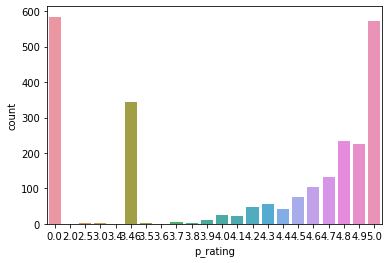

In [ ]:
sns.countplot(df['p_rating'])

###Number of Mall products vs. Non-mall products

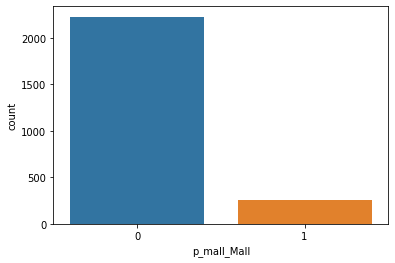

In [ ]:
sns.countplot(df['p_mall_Mall'])

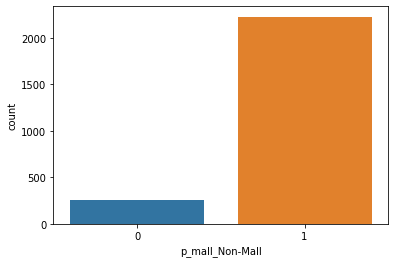

In [ ]:
sns.countplot(df['p_mall_Non-Mall'])

### Distribution of Number of Reviews

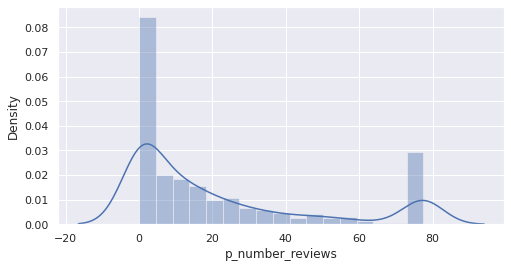

In [ ]:
sns.set(rc={"figure.figsize": (8, 4)})
sns.distplot(df['p_number_reviews'])

###Training and Testing Data

In [ ]:
#X represents all independent variables while y represents the dependent variable 'p_rating'
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
import xgboost as xgb

train = xgb.DMatrix (X_train, label = y_train)
test = xgb.DMatrix (X_test, label = y_test)

In [ ]:
#Hyper Parameters
param = {

    'C': 20,
    'colsample_bytree': 0.7,
    'gamma': 0.3,
    'max_depth': 1,
    'max_features': 6,
    'min_child_weight': 5,
    'n_estimators': 100,
    'learning_rate' : 1.1,
    'eta': 3,
    'objective':'count:poisson',
}
epochs = 10

In [ ]:
#Train

model = xgb.train(param, train, epochs)

In [ ]:
#Predict
predictions = model.predict(test)

In [ ]:
# RMSE Computation
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, predictions))
print("RMSE : % f" %(rmse))

RMSE :  0.619320


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(model,{

    'C':[1,10,20],
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_child_weight' : [1,3,5,7],
    'gamma' : [0.0,0.1,0.2,0.3,0.4],
    'colsample_bytree': [0.3,0.4,0.5,0.6,0.7],
    'max_features': [1,2,3,4,5,6],
    'n_estimators': [20,40,50,70,100],

},
cv = 5,
return_train_score = False,
n_iter = 32
)

rs.fit(X, y)

RandomizedSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
                   n_iter=32,
                   param_distributions={'C': [1, 10, 20],
                                        'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'max_features': [1, 2, 3, 4, 5, 6],
                                        'min_child_weight': [1, 3, 5, 7],
                                        'n_estimators': [20, 40, 50, 70, 100]})

In [ ]:
rs.best_params_

{'C': 1,
 'colsample_bytree': 0.7,
 'gamma': 0.2,
 'max_depth': 2,
 'max_features': 2,
 'min_child_weight': 7,
 'n_estimators': 50}

In [ ]:
#Cross Validation
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

model = XGBRegressor(objective = "reg:squarederror")

In [ ]:
scores = cross_val_score(model, X, y, scoring = "neg_mean_squared_error", cv = 5, error_score="raise")
rmse = np.sqrt(-scores)

In [ ]:
print(rmse)

[0.79315089 0.60207253 0.48384612 0.77388352 0.68616396]


In [ ]:
df.head(5)

,p_rating,s_response_rate,s_ship_ontime,p_brand_4Tech,p_brand_4U,p_brand_ARCTIC HUNTER,p_brand_ASUS,p_brand_ATAS,p_brand_Adidas,p_brand_Apple,p_brand_BASEUS,p_brand_BEE GEE,p_brand_BEMINE,p_brand_BLEUBIRD,p_brand_BT Fashion,p_brand_Beego,p_brand_BigMax,p_brand_Blitzwolf,p_brand_Brand's,p_brand_CARECAM,p_brand_CHENNY,p_brand_CNT,p_brand_Cali D&Y,p_brand_Cater,p_brand_Coemi,p_brand_Dahua,p_brand_Dell,p_brand_Dottie,p_brand_EDINI,p_brand_Elise,p_brand_Epson,p_brand_Ezviz,p_brand_FPT Play Box,p_brand_Fantech,p_brand_Fitbit,p_brand_Fujifilm,p_brand_Garmin,p_brand_Gigabyte,p_brand_GoPro,p_brand_Google,p_brand_Gumac,p_brand_H & N,p_brand_HARAS,p_brand_HOCE,p_brand_HP,p_brand_HTG8,p_brand_HUAMI,p_brand_HUAWEI HiLink,p_brand_Handtown,p_brand_Harman Kardon,p_brand_Haylou,p_brand_Hikvision,p_brand_Hoco,p_brand_Honjianda,p_brand_Honor,p_brand_Huawei,p_brand_HuaweiVN,p_brand_IMOU,p_brand_Insta360,p_brand_Intel,p_brand_KB One,p_brand_KBone,p_brand_KEBETEME,p_brand_LG,p_brand_Laptop,p_brand_Lata,p_brand_Lenovo,p_brand_Logitech,p_brand_LouisWill,p_brand_M STUDIO,p_brand_MAC,p_brand_MOEM,p_brand_MSI,p_brand_Magicsee,p_brand_Marshall,p_brand_Matsuma,p_brand_Memo,p_brand_Mibro,p_brand_Microsoft,p_brand_Mocute,p_brand_Motorola,p_brand_Mykid,p_brand_Netcam,p_brand_Nintendo,p_brand_No Brand,p_brand_No brand,p_brand_Nokia,p_brand_North Bayou,p_brand_OCEM,p_brand_OEM,p_brand_Oio,p_brand_OnePlus,p_brand_Oppo,p_brand_Ordro,p_brand_Playstation,p_brand_Razer,p_brand_Rechic,p_brand_SJCAM,p_brand_SONY,p_brand_Samsung,p_brand_Shalla,p_brand_Sharp,p_brand_Smart New,p_brand_Smart Washer,p_brand_Smart Watches,p_brand_SoundPEATS,p_brand_TCL,p_brand_TP-Link,p_brand_Takstar,p_brand_Teclast,p_brand_The Maven SAIGON,p_brand_Thinkpad,p_brand_Three Box,p_brand_Thủy tinh,p_brand_Toshiba,p_brand_Tsun,p_brand_UGREEN,p_brand_VIET STAR QUOC TE,p_brand_VONDA,p_brand_VTC,p_brand_Vention,p_brand_Viettel,p_brand_Wiin House,p_brand_Xiaomi,p_brand_YBD,p_brand_ZIYOU LANG,p_brand_amazfit,p_brand_chuwi,p_brand_galileo,p_brand_gor,p_brand_iCase,p_brand_inktec,p_brand_iron man,p_brand_kbvision,p_brand_komaxi,p_brand_laza,p_brand_masstel,p_brand_plextone,p_brand_shoptida,p_brand_siepem,p_brand_sino,p_brand_surface,p_brand_topk,p_brand_vinaphone,p_brand_vsmart,p_brand_wonlex,p_brand_xprinter,p_brand_yoosee,p_brand_yuumy,p_brand_zanzea,p_brand_zeblaze,p_brand_zmi,p_cate_Electronics Accessories,p_cate_Giày dép & Quần áo nữ,p_cate_Màn hình & Máy in,p_cate_Máy vi tính & Laptop,p_cate_Máy ảnh & Máy bay camera,p_cate_TV & Video,p_cate_Thiết bị thông minh,p_cate_Túi xách và Vali túi du lịch,p_cate_Âm thanh,p_cate_Điện thoại & Máy tính bảng,p_mall_Mall,p_mall_Non-Mall,p_number_reviews,p_price
0,0.0,100.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,3116587.5
1,0.0,89.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0.0,3116587.5
2,5.0,89.0,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1.0,3116587.5
3,0.0,82.5,100.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,